# Session 4
## Robustness and resilience of networked systems

In [9]:
import networkx as nx
n = 40
G = nx.barabasi_albert_graph(n, 5)
m = G.number_of_edges()

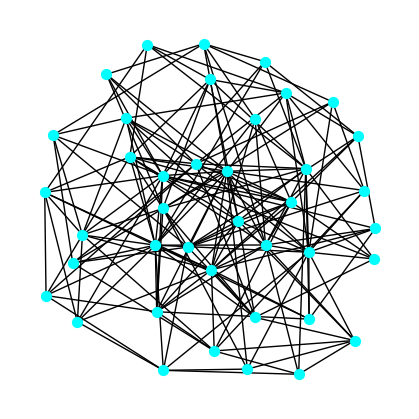

In [10]:
L = nx.kamada_kawai_layout(G)

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 4), dpi =  100)
nx.draw(G, L, node_size = 50, node_color = 'cyan')

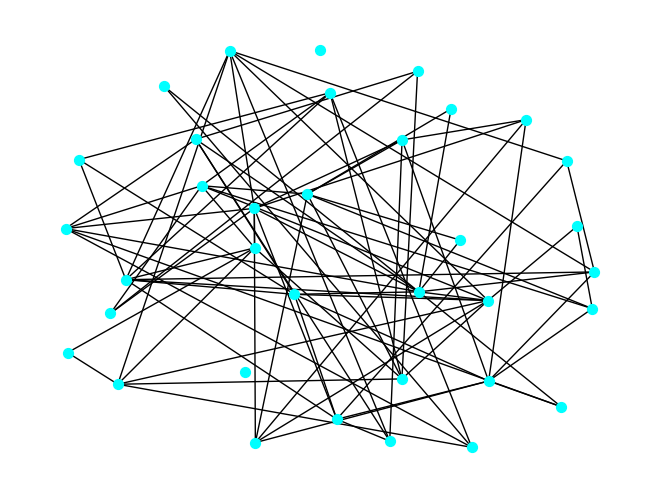

In [96]:
import networkx as nx

n = 40
G = nx.barabasi_albert_graph(n, 5)


from random import choice

import networkx as nx

# Generate a Barabási–Albert graph
n = 40
G = nx.barabasi_albert_graph(n, 5)

# Calculate the centrality measures for the nodes
centrality = nx.degree_centrality(G)

# Select the top 5 nodes with the highest centrality
top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:5]

# Break down or remove these nodes from the graph
for node in top_nodes:
    G.remove_node(node)

nx.draw(G, L, node_size = 50, node_color = 'cyan')


In [46]:
!pip install celluloid. #

ERROR: Invalid requirement: 'celluloid.'


35 10
10 24
24 29
29 8
8 27
27 9
9 32
32 26
26 20
20 23
23 1
1 37


[]

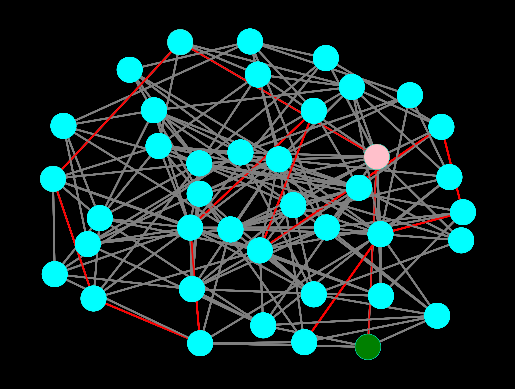

In [47]:
from random import choice # pseudo-randomness
from celluloid import Camera # creating animations

fig, ax = plt.subplots()
cam = Camera(fig) # for storing the frames

current = choice(list(G.nodes()))

used = set()
for step in range(12): # random walk
    neighbor = choice(list(G.neighbors(current)))
    used.add((current, neighbor))
    used.add((neighbor, current))

    vc = [ 'cyan' for v in G.nodes() ]
    vc[current] = 'pink'
    vc[neighbor] = 'green'

    ec = [ 'red' if e in used else 'gray' for e in G.edges() ]

    nx.draw(G, pos = L, node_color = vc, edge_color = ec)

    ax.set_facecolor('black')
    fig.set_facecolor('black')
    ax.axis('off')
    print(current, neighbor)
    cam.snap() # take a snapshot
    current = neighbor

cam.snap() # take a snapshot at the end

In [48]:
import IPython
animation = cam.animate(interval = 600) # milliseconds between frames
show = display(IPython.display.HTML(animation.to_html5_video()))

Graphs: connected components

In [21]:
from random import choice

Gc = G.copy()
goal = 3 # to how many pieces we wish to break it
n = G.number_of_nodes()
m = G.number_of_edges()

ad = []
while True:     # repeat until~
  broken = choice(list(Gc.nodes))
  Gc.remove_node(broken)
  nNow = Gc.number_of_nodes()
  mNow = Gc.number_of_edges()
  #print(f'{nNow} vertices, down from {n}')
  #print(f'{mNow} edges, down from {m}')
  comp = [ cc for cc in nx.connected_components(Gc) ]
  pieces = len(comp)
  if pieces == 1:
    avgd = nx.average_shortest_path_length(Gc)
    ad.append(avgd)  # Append the avgd value to the list
    #print(f'Avg distance now at {avgd:.2f}')
  elif pieces >= goal:
    break

print([round(value, 3) for value in ad])

rad = [round(value, 3) for value in ad]

[1.874, 1.875, 1.881, 1.878, 1.872, 1.886, 1.879, 1.879, 1.905, 1.943, 1.958, 1.95, 1.943, 1.926, 1.933, 1.935, 1.889, 1.887, 1.867, 1.842, 1.86, 1.856, 1.831, 1.825, 1.79, 1.857, 1.782, 1.758, 1.782, 1.8, 1.861, 1.929, 2.0]


27 1.758


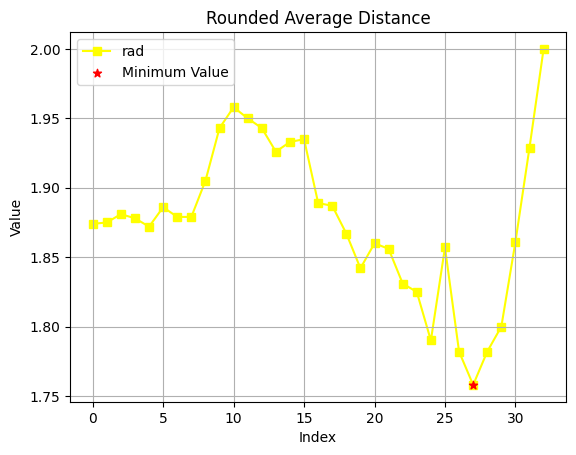

In [79]:
import matplotlib.pyplot as plt

rad = [1.874, 1.875, 1.881, 1.878, 1.872, 1.886, 1.879, 1.879, 1.905, 1.943, 1.958, 1.95, 1.943, 1.926, 1.933, 1.935, 1.889, 1.887, 1.867, 1.842, 1.86, 1.856, 1.831, 1.825, 1.79, 1.857, 1.782, 1.758, 1.782, 1.8, 1.861, 1.929, 2.0]

min_value = min(rad)
min_index = rad.index(min_value)
print(min_index, min_value)
plt.plot(rad, marker='s', color='yellow', label='rad', zorder = 1)
plt.scatter([min_index], [min_value], marker = '*', color='red', label='Minimum Value', zorder = 8)  # Highlight the minimum value with a red dot

plt.title('Rounded Average Distance')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [64]:
Value

NameError: name 'value' is not defined

In [ ]:
cc = nx.connected_components(Gc)
for comp in cc:
  print(len(comp))

2
2
2


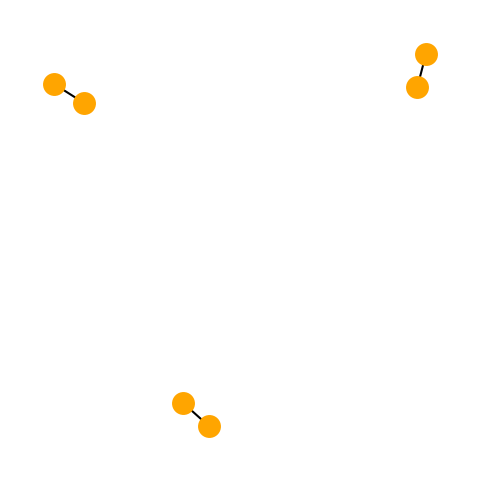

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (3, 3), dpi =  150)
nx.draw(Gc, pos = nx.spring_layout(Gc), node_size = 100, node_color = 'orange')